In [8]:
import pandas as pd
import numpy as np

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
data = pd.read_excel(url, header=1)

# Display the first five rows and dataset info
print(data.head())
print(data.info())

# Check for missing values
print("Missing values per column:\n", data.isnull().sum())


   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0   

In [9]:
# Remove duplicate rows
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
data = data.drop_duplicates()

# Drop the ID column as it's not useful for modeling
data = data.drop(columns=["ID"])


Number of duplicate rows: 0


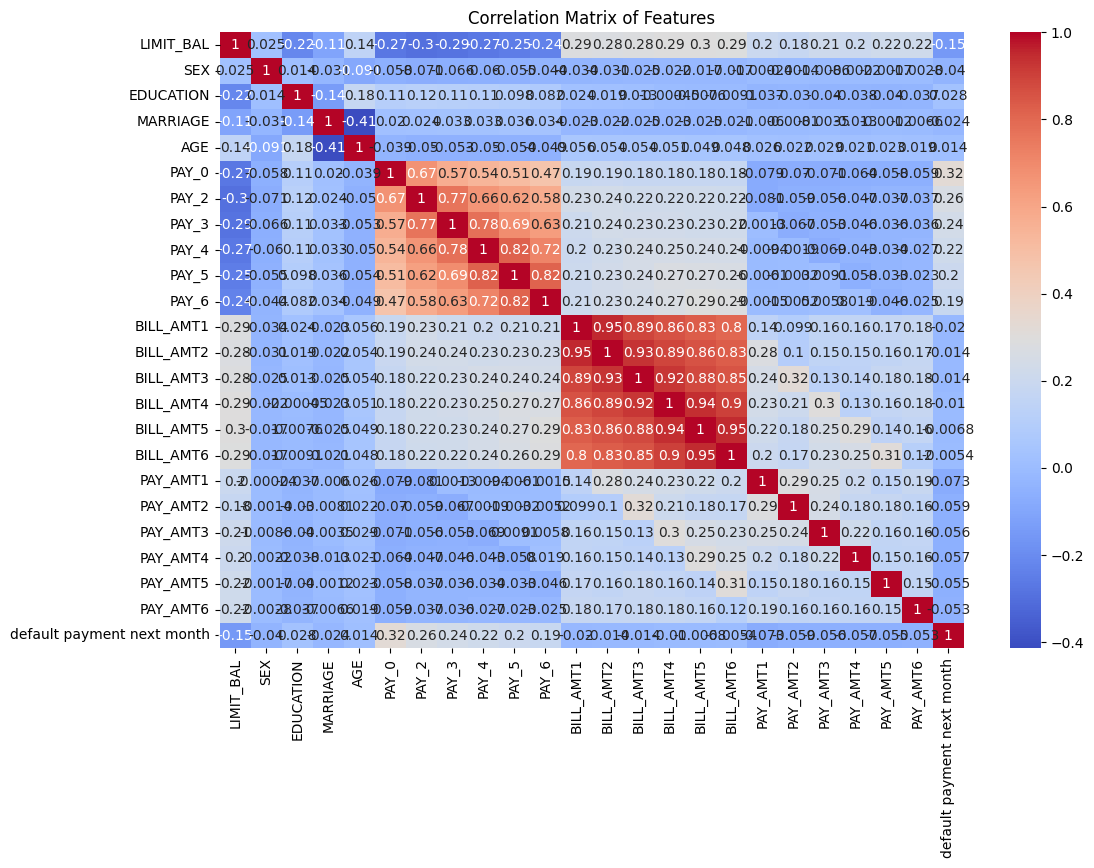

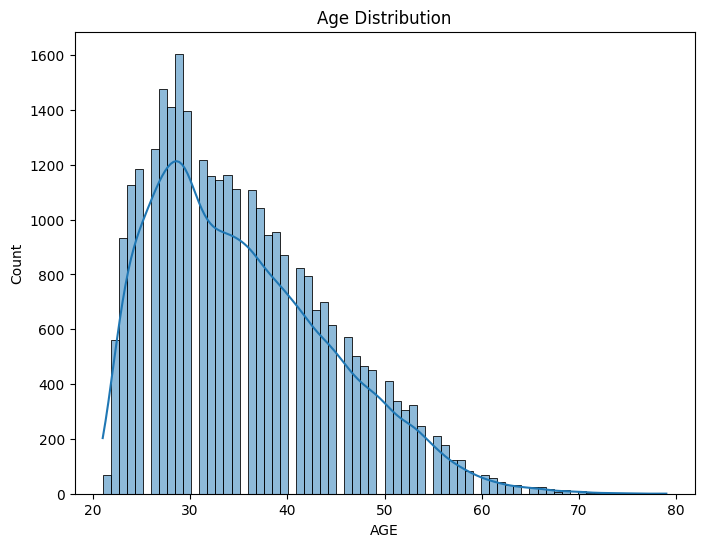

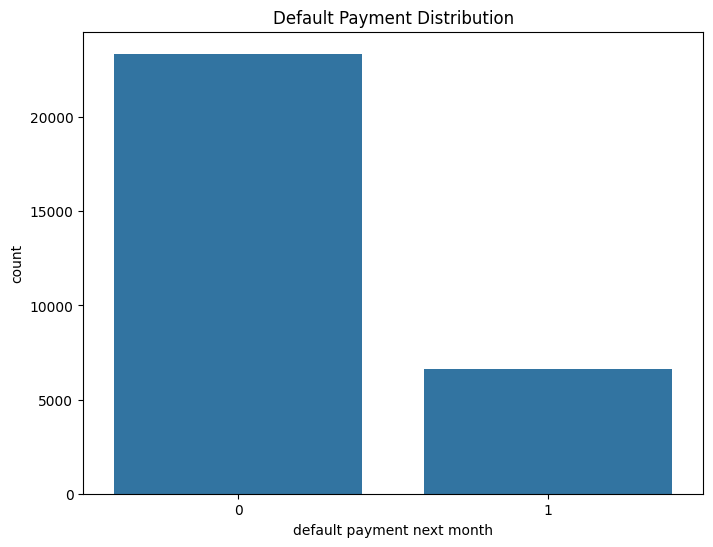

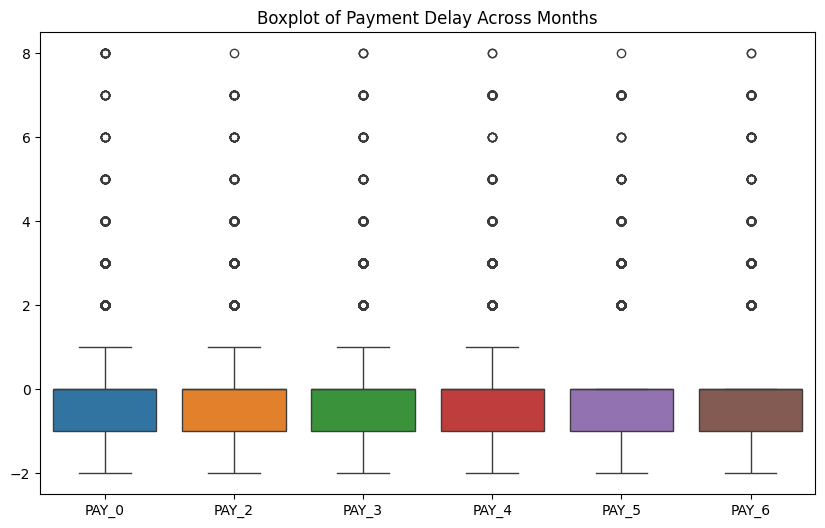

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix to explore feature relationships
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Features")
plt.show()

# Distribution of age
plt.figure(figsize=(8, 6))
sns.histplot(data['AGE'], kde=True)
plt.title('Age Distribution')
plt.show()

# Default payment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='default payment next month', data=data)
plt.title('Default Payment Distribution')
plt.show()

# Payment delay across months
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']])
plt.title('Boxplot of Payment Delay Across Months')
plt.show()


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the target column and features
target_column = 'default payment next month'
X = data.drop(columns=[target_column])
y = data[target_column]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Logistic regression with cross-validation
log_reg = LogisticRegression(max_iter=1000)
cv_scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=5)
print(f"Mean CV accuracy: {cv_scores.mean():.2f}, Standard deviation: {cv_scores.std():.2f}")

# Train the model and evaluate on the test set
log_reg.fit(X_train_scaled, y_train)
test_accuracy = log_reg.score(X_test_scaled, y_test)
print(f"Test set accuracy: {test_accuracy:.2f}")


Mean CV accuracy: 0.81, Standard deviation: 0.00
Test set accuracy: 0.81


In [24]:
import gradio as gr

# Prediction function for Gradio app
# Set up Gradio input components with descriptive labels for payment statuses without numbers
input_features = [
    gr.Slider(minimum=10000, maximum=1000000, value=50000, label="LIMIT_BAL"),
    gr.Dropdown(choices=["Male", "Female"], label="SEX"),
    gr.Dropdown(choices=["Graduate School", "University", "High School", "Others"], label="EDUCATION"),
    gr.Dropdown(choices=["Single", "Married", "Divorced", "Widowed"], label="MARRIAGE"),
    gr.Slider(minimum=21, maximum=79, value=30, label="AGE"),
    gr.Dropdown(choices=[
        "No consumption", "Paid in full", "Paid minimum due",
        "1 month late", "2 months late", "3 months late",
        "4 months late", "5 months late", "6 months late",
        "7 months late", "8 months late"
    ], label="PAY_1"),
    gr.Dropdown(choices=[
        "No consumption", "Paid in full", "Paid minimum due",
        "1 month late", "2 months late", "3 months late",
        "4 months late", "5 months late", "6 months late",
        "7 months late", "8 months late"
    ], label="PAY_2"),
    gr.Dropdown(choices=[
        "No consumption", "Paid in full", "Paid minimum due",
        "1 month late", "2 months late", "3 months late",
        "4 months late", "5 months late", "6 months late",
        "7 months late", "8 months late"
    ], label="PAY_3"),
    gr.Dropdown(choices=[
        "No consumption", "Paid in full", "Paid minimum due",
        "1 month late", "2 months late", "3 months late",
        "4 months late", "5 months late", "6 months late",
        "7 months late", "8 months late"
    ], label="PAY_4"),
    gr.Dropdown(choices=[
        "No consumption", "Paid in full", "Paid minimum due",
        "1 month late", "2 months late", "3 months late",
        "4 months late", "5 months late", "6 months late",
        "7 months late", "8 months late"
    ], label="PAY_5"),

    gr.Slider(minimum=-165580, maximum=964511, value=399465.5, label="BILL_AMT1"),
    gr.Slider(minimum=-69777, maximum=983931, value=457077, label="BILL_AMT2"),
    gr.Slider(minimum=-157264, maximum=1664089, value=753412.5, label="BILL_AMT3"),
    gr.Slider(minimum=-170000, maximum=891586, value=360793, label="BILL_AMT4"),
    gr.Slider(minimum=-81334, maximum=927171, value=422918.5, label="BILL_AMT5"),

    gr.Slider(minimum=0, maximum=873552, value=436776, label="PAY_AMT1"),
    gr.Slider(minimum=0, maximum=1684259, value=842129.5, label="PAY_AMT2"),
    gr.Slider(minimum=0, maximum=896040, value=448020, label="PAY_AMT3"),
    gr.Slider(minimum=0, maximum=621000, value=310500, label="PAY_AMT4"),
    gr.Slider(minimum=0, maximum=426529, value=213264.5, label="PAY_AMT5"),

]


# Create and launch the Gradio interface
gr.Interface(fn=predict_default, inputs=input_features, outputs="text").launch()


/usr/local/lib/python3.10/dist-packages/gradio/utils.py:980: UserWarning: Expected 23 arguments for function <function predict_default at 0x7e9eb9304ee0>, received 20.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/utils.py:984: UserWarning: Expected at least 23 arguments for function <function predict_default at 0x7e9eb9304ee0>, received 20.
  warnings.warn(


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://9dd5bdc6611b1287a4.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
